In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import models, layers


In [2]:
df = pd.read_csv("../data/processed/cleaned_employee_data.csv")
df.head()


,employee_id,age,monthly_income,years_at_company,job_satisfaction,performance_rating,overtime,attrition,gender_Male,department_Research & Development,department_Sales,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative
0,1,41,5993,6,4,3,1,1,False,False,True,False,False,False,False,False,False,True,False
1,2,49,5130,10,2,4,0,0,True,True,False,False,False,False,False,False,True,False,False
2,3,37,2090,0,3,3,1,1,True,True,False,False,True,False,False,False,False,False,False
3,4,33,2909,8,3,3,1,0,False,True,False,False,False,False,False,False,True,False,False
4,5,27,3468,2,2,3,0,0,True,True,False,False,True,False,False,False,False,False,False


In [4]:
X = df.drop("attrition", axis=1)
y = df["attrition"]


# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import joblib
joblib.dump(scaler, "../models/scaler.pkl")



['../models/scaler.pkl']

In [13]:
# Neural Network Model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\lenovo\Desktop\Machine Learning\Employee_Attrition_Predictor\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the Model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8326 - loss: 0.4443 - val_accuracy: 0.8350 - val_loss: 0.3890
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.4055 - val_accuracy: 0.8350 - val_loss: 0.3758
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.3932 - val_accuracy: 0.8371 - val_loss: 0.3701
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.3851 - val_accuracy: 0.8428 - val_loss: 0.3631
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3774 - val_accuracy: 0.8477 - val_loss: 0.3594
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3741 - val_accuracy: 0.8484 - val_loss: 0.3588
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.3695 - val_accuracy: 0.8492 - val_loss: 0.3545
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3621 - val_accuracy: 0.

In [10]:
# Evaluate the Model

predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8707482993197279

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1480
           1       0.72      0.32      0.44       284

    accuracy                           0.87      1764
   macro avg       0.80      0.65      0.69      1764
weighted avg       0.86      0.87      0.85      1764

[[1445   35]
 [ 193   91]]


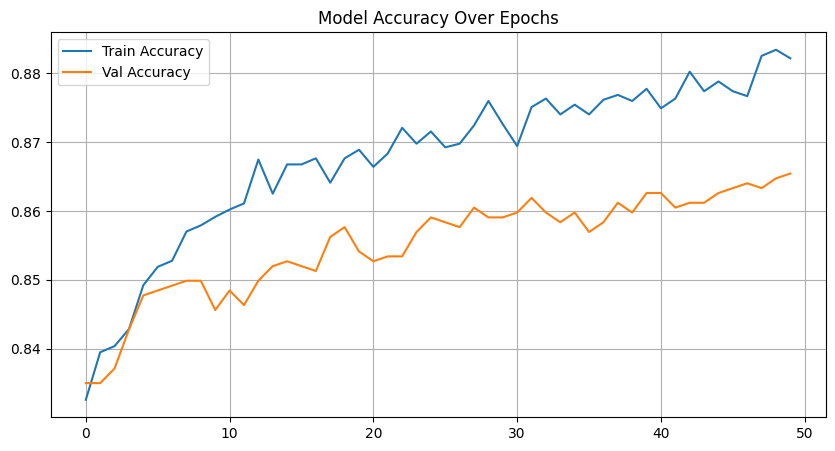

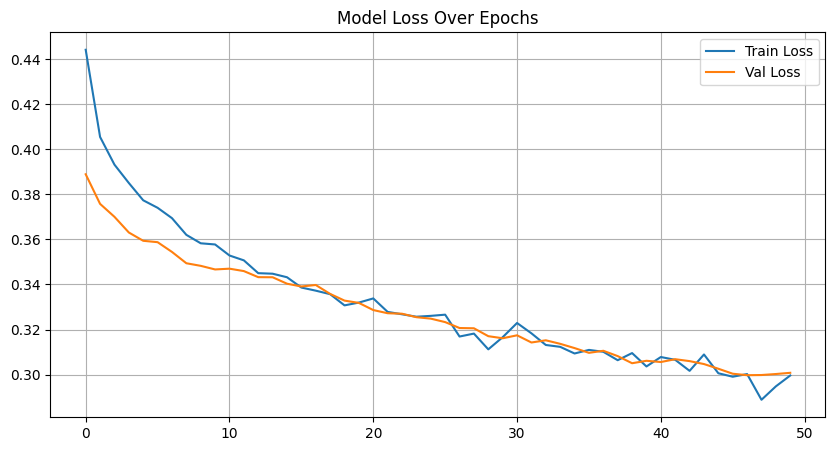

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()


In [12]:
model.save("../models/attrition_model.h5")
